<a href="https://colab.research.google.com/github/demi-echo/CodeClauseInternship_CustomerSegmentationWithK-MeansClustering/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000       

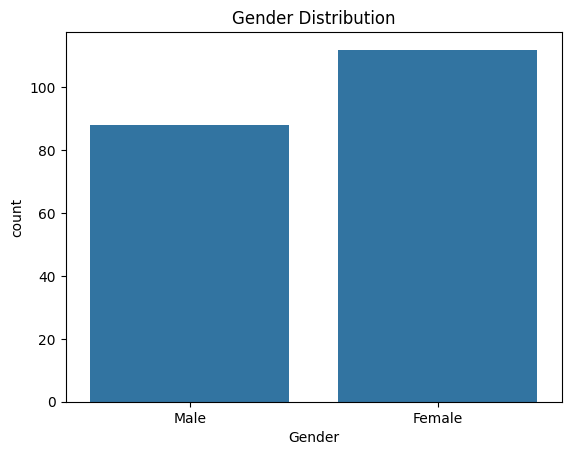

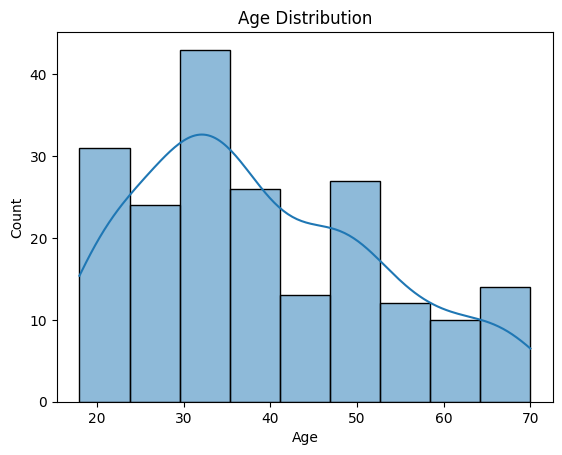

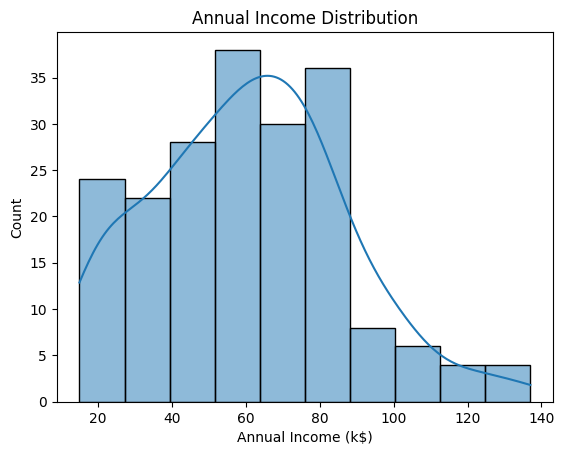

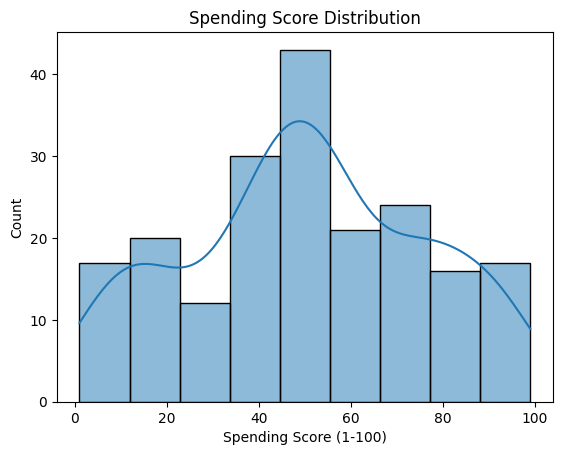


[[-1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [-1.12815215 -1.28103541 -1.73899919  1.19570407]
 [ 0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [ 0.88640526 -1.13750203 -1.70082976  1.04041783]
 [ 0.88640526 -0.56336851 -1.66266033 -0.39597992]]



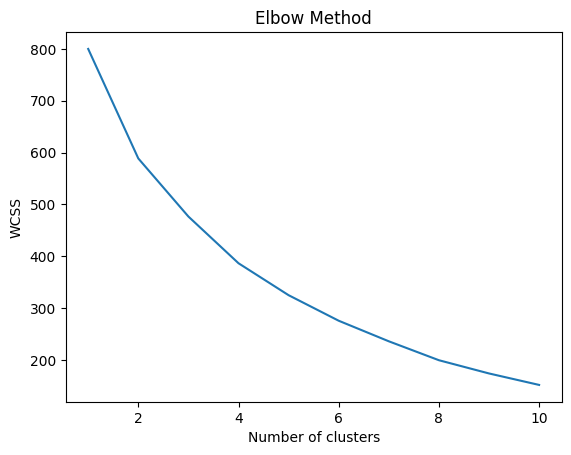


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       1   31                  17                      40   

   Cluster  
0        1  
1        1  
2        2  
3        0  
4        2  



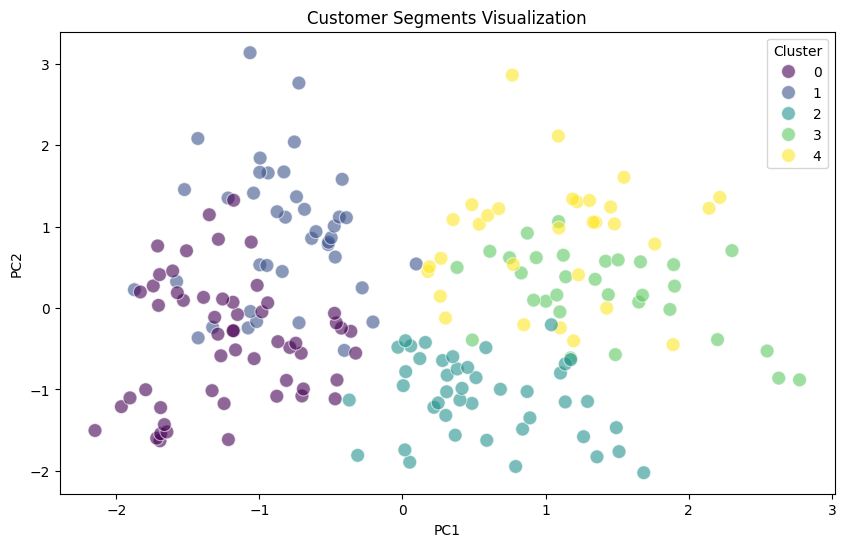


         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0        102.854545  1.000000  28.345455           60.800000   
1        103.375000  0.000000  28.250000           62.000000   
2         66.651163  1.000000  48.720930           46.186047   
3         72.612903  0.000000  55.903226           48.774194   
4        167.451613  0.451613  40.419355           90.000000   

         Spending Score (1-100)  
Cluster                          
0                     68.654545  
1                     71.675000  
2                     39.674419  
3                     38.806452  
4                     15.741935  



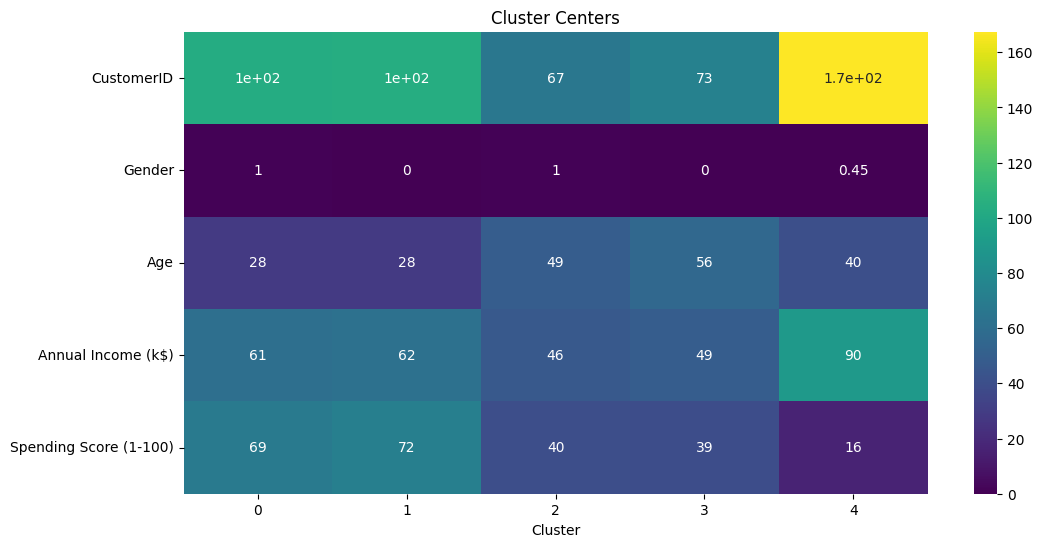

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('/content/Mall_Customers.csv')

# Display the first few rows of the dataset
print(df.head())

# Summary statistics
print(df.describe())
print()

# Checking for missing values
print(df.isnull().sum())
print()

# Distribution of Gender
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()
print()

# Distribution of Age
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()
print()

# Distribution of Annual Income
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Annual Income Distribution')
plt.show()
print()

# Distribution of Spending Score
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')
plt.show()
print()

# Convert Gender to numerical values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Selecting features for clustering
features = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display the scaled features
print(scaled_features[:5])
print()

# Use the elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
print()

# Applying KMeans to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster column to the original dataframe
df['Cluster'] = clusters

# Display the first few rows with cluster assignments
print(df.head())
print()

# Reduce the dimensionality of the data using PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.6, edgecolor='w')
plt.title('Customer Segments Visualization')
plt.show()
print()

# Analyze the characteristics of each cluster
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)
print()

# Visualize the cluster centers
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_analysis.T, annot=True, cmap='viridis')
plt.title('Cluster Centers')
plt.show()